# Gaussian Naive Bayes

# Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Datengrundlage

In [6]:
data = pd.read_csv("../../../../data/census.csv")[["age","hours-per-week","target"]]
data["target"] = data["target"].map({" <=50K":0," >50K":1})

In [7]:
data.tail(10)

,age,hours-per-week,target
32551,32,40,0
32552,43,45,0
32553,32,11,0
32554,53,40,1
32555,22,40,0
32556,27,38,0
32557,40,40,1
32558,58,40,0
32559,22,20,0
32560,52,40,1


## Darstellung der Verteilungen

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_7017/1383584853.py:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  age_density_high = stats.kde.gaussian_kde(data.loc[data["target"]==1]["age"])
/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_7017/1383584853.py:2: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  age_density_low = stats.kde.gaussian_kde(data.loc[data["target"]==0]["age"])


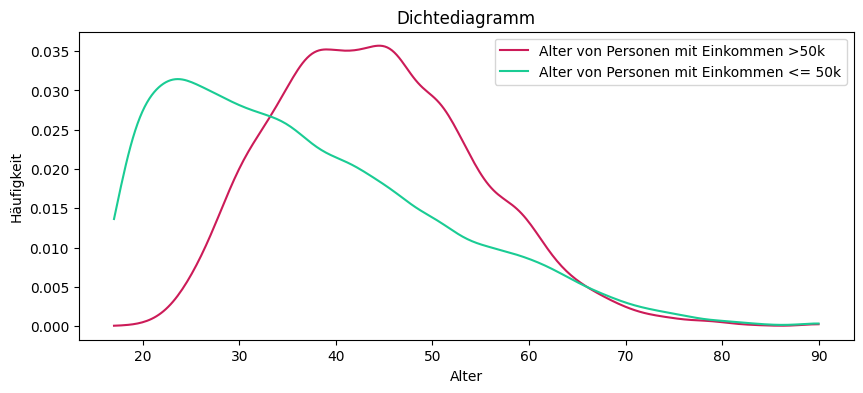

In [8]:
age_density_high = stats.kde.gaussian_kde(data.loc[data["target"]==1]["age"])
age_density_low = stats.kde.gaussian_kde(data.loc[data["target"]==0]["age"])
x = np.linspace(data["age"].min(),data["age"].max(),300)

plt.figure(figsize=(10,4))
plt.title("Dichtediagramm")
plt.plot(x, age_density_high(x),color="#CC1B58",label="Alter von Personen mit Einkommen >50k")
plt.plot(x, age_density_low(x),color="#1ACC94",label="Alter von Personen mit Einkommen <= 50k")
plt.ylabel("Häufigkeit")
plt.xlabel("Alter")
plt.legend()
plt.show()

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_7017/546358644.py:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  hours_density_high = stats.kde.gaussian_kde(data.loc[data["target"]==1]["hours-per-week"])
/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_7017/546358644.py:2: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  hours_density_low = stats.kde.gaussian_kde(data.loc[data["target"]==0]["hours-per-week"])


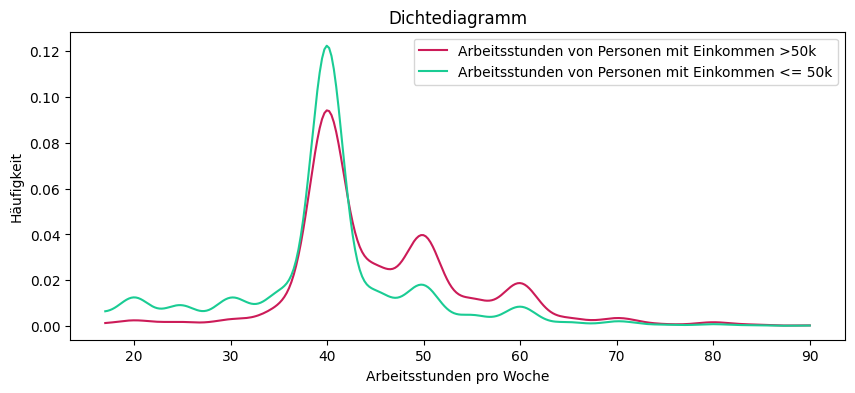

In [9]:
hours_density_high = stats.kde.gaussian_kde(data.loc[data["target"]==1]["hours-per-week"])
hours_density_low = stats.kde.gaussian_kde(data.loc[data["target"]==0]["hours-per-week"])
x = np.linspace(data["age"].min(),data["age"].max(),300)

plt.figure(figsize=(10,4))
plt.title("Dichtediagramm")
plt.plot(x, hours_density_high(x),color="#CC1B58",label="Arbeitsstunden von Personen mit Einkommen >50k")
plt.plot(x, hours_density_low(x),color="#1ACC94",label="Arbeitsstunden von Personen mit Einkommen <= 50k")
plt.ylabel("Häufigkeit")
plt.xlabel("Arbeitsstunden pro Woche")
plt.legend()
plt.show()

## Unbekannte Instanz

In [10]:
unknown = np.array([25,40])

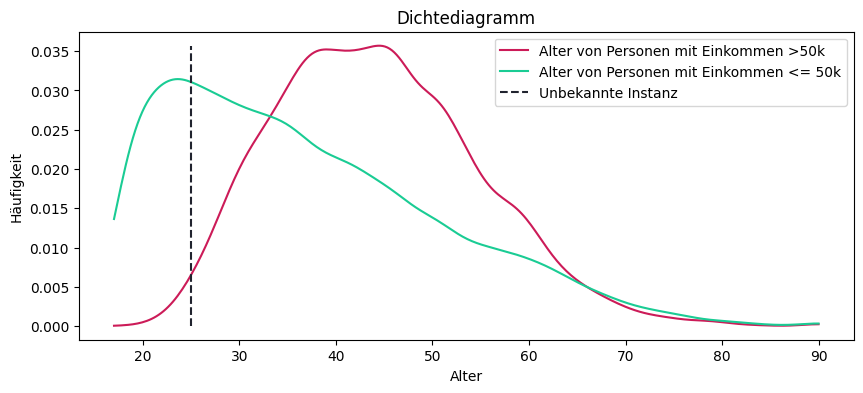

In [11]:
plt.figure(figsize=(10,4))
plt.title("Dichtediagramm")
plt.plot(x, age_density_high(x),color="#CC1B58",label="Alter von Personen mit Einkommen >50k")
plt.plot(x, age_density_low(x),color="#1ACC94",label="Alter von Personen mit Einkommen <= 50k")
plt.vlines(unknown[0],min(age_density_high(x)),max(age_density_high(x)),color="#20232E",ls="--",label="Unbekannte Instanz")
plt.ylabel("Häufigkeit")
plt.xlabel("Alter")
plt.legend()
plt.show()

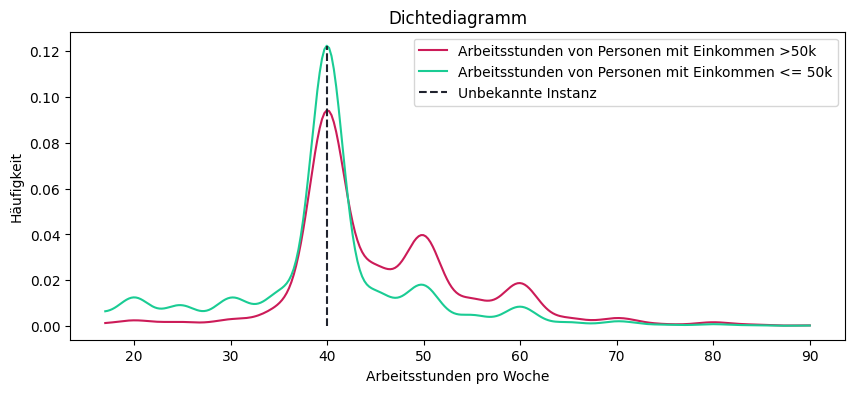

In [12]:
plt.figure(figsize=(10,4))
plt.title("Dichtediagramm")
plt.plot(x, hours_density_high(x),color="#CC1B58",label="Arbeitsstunden von Personen mit Einkommen >50k")
plt.plot(x, hours_density_low(x),color="#1ACC94",label="Arbeitsstunden von Personen mit Einkommen <= 50k")
plt.vlines(unknown[1],min(hours_density_low(x)),max(hours_density_low(x)),color="#20232E",ls="--",label="Unbekannte Instanz")
plt.ylabel("Häufigkeit")
plt.xlabel("Arbeitsstunden pro Woche")
plt.legend()
plt.show()

## Ergebnis errechnen

In [13]:
prior_probability_high_income = data.loc[data["target"]==1].shape[0]/data.shape[0]
prior_probability_low_income = data.loc[data["target"]==0].shape[0]/data.shape[0]

print("Wahrscheinlichkeit eines hohen Einkommens: {:.0f}%".format(prior_probability_high_income*100))
print("Wahrscheinlichkeit eines niedrigen Einkommens: {:.0f}%".format(prior_probability_low_income*100))

Wahrscheinlichkeit eines hohen Einkommens: 24%
Wahrscheinlichkeit eines niedrigen Einkommens: 76%


In [14]:
probability_high_income = np.log(prior_probability_high_income*age_density_high(unknown[0])*hours_density_high(unknown[1]))
probability_low_income = np.log(prior_probability_low_income*age_density_low(unknown[0])*hours_density_low(unknown[1]))
print(probability_high_income)
print(probability_low_income)

[-8.81500964]
[-5.84806629]


In [15]:
if probability_high_income > probability_low_income:
    print("Die Person hat vermutlich ein Einkommen >= 50k")
else:
    print("Die Person hat vermutlich ein Einkommen < 50k")

Die Person hat vermutlich ein Einkommen < 50k
